<a href="https://colab.research.google.com/github/veldahung/machine_learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
!wget "https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

from sklearn.linear_model import LinearRegression

from utils import display_side_by_side, DataLoader

--2023-08-24 14:09:10--  https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py [following]
--2023-08-24 14:09:10--  https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py [following]
--2023-08-24 14:09:10--  https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request se

# Logistic Regression

From sklearn:


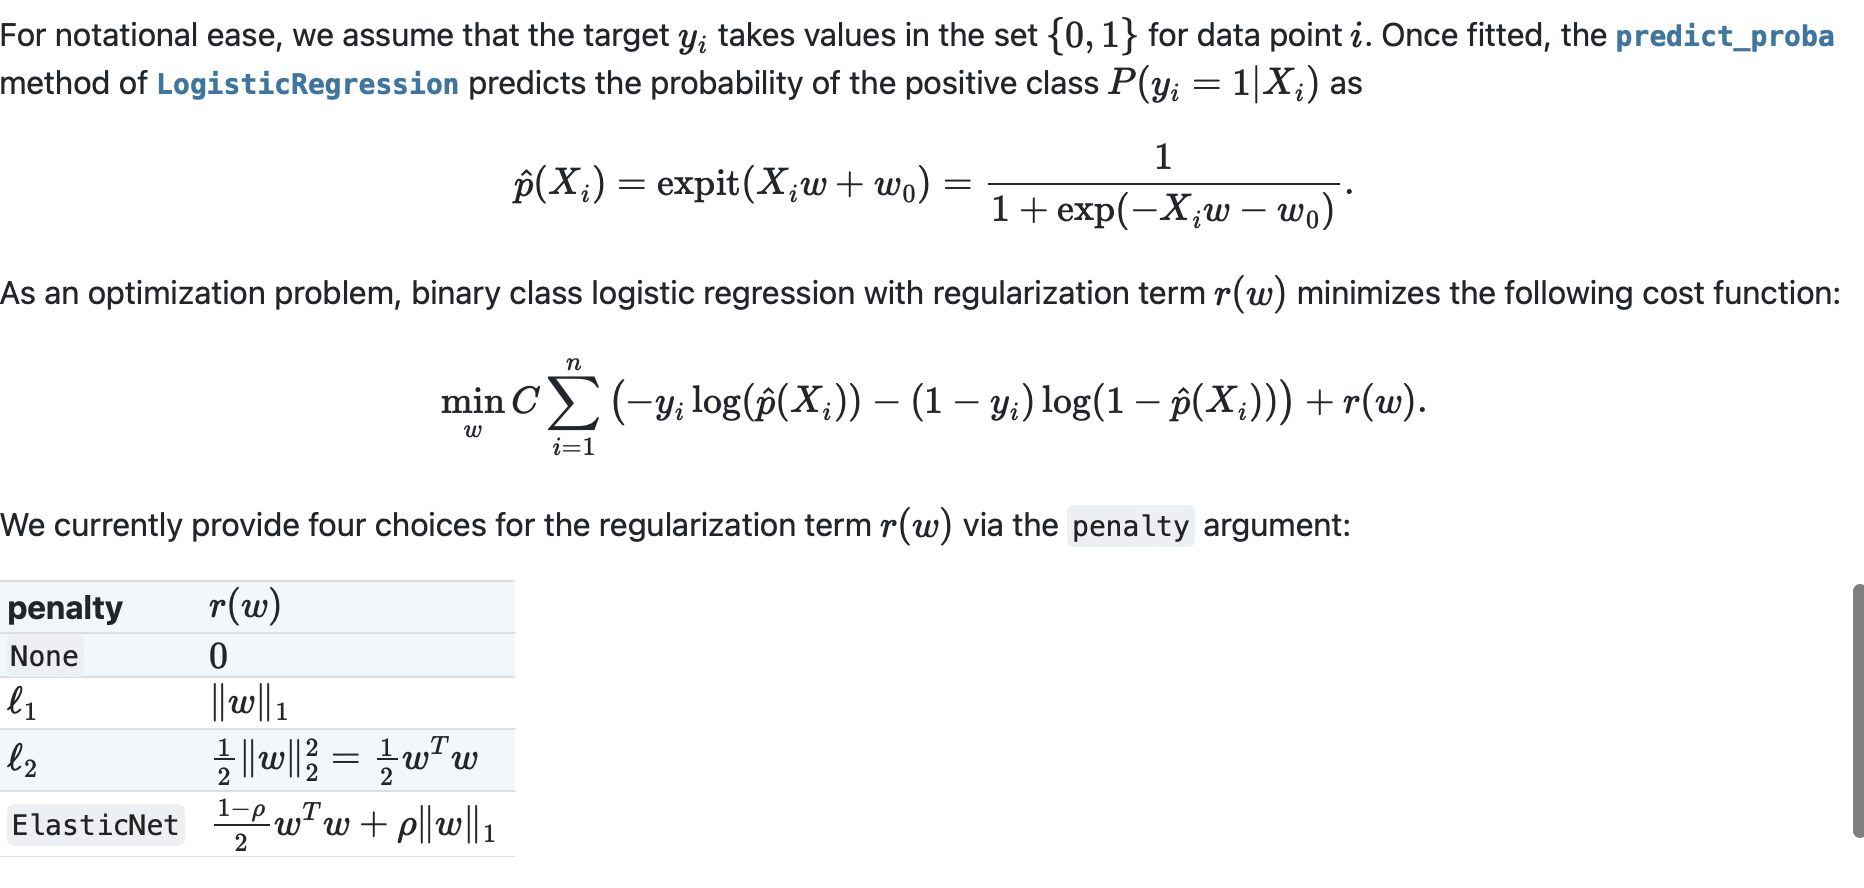




In [ ]:
train = DataLoader.load_data('lending_club_reduced_train_url')
test = DataLoader.load_data('lending_club_reduced_test_url')

# 1 = good, 0 = default

# give column names
cols = ['home_ownership', 'income', 'dti', 'fico_low', 'loan_status']
train.columns = test.columns = cols

print(train.head())
print("--------------------------------")
print(test.head())

   home_ownership  income    dti  fico_low  loan_status
0               1  44.304  18.47       690            0
1               0  38.500  33.73       660            0
2               1  54.000  19.00       660            0
3               1  60.000  33.98       695            0
4               0  39.354  10.85       685            0
--------------------------------
   home_ownership  income    dti  fico_low  loan_status
0               1   127.0  10.94       675            0
1               1   197.0  15.64       710            0
2               1    25.5  28.75       670            0
3               1    80.0  20.16       660            0
4               0    57.0  30.60       675            0


For the purposes of this exercise, the dataset has already been split into train and test set. There are 8695 instances of training set and 5916 instances of test set with with four features and one target. The four features are home_ownership, income, dti and fico_low and the target is loan status that includes either fully paid or defaulted loans only.

In [ ]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

# store target column
y_train = train['loan_status']
y_test = test['loan_status']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.columns

(8695, 4) (8695,) (5916, 4) (5916,)


Index(['home_ownership', 'income', 'dti', 'fico_low'], dtype='object')

In [ ]:
freq = y_train.value_counts()           # count frequency of different classes in loan status
freq/sum(freq)*100                      # get percentage of above


1    82.760207
0    17.239793
Name: loan_status, dtype: float64

In [ ]:
lgstc_reg =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_reg.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_reg.intercept_, lgstc_reg.coef_)     # get the coefficients of each features


#lr=LinearRegression()

#lr.fit(X_train,y_train)

#print(lr.intercept_, lr.coef_)

[-6.5652302] [[ 0.139496    0.00410667 -0.00112302  0.0112521 ]]


The bias is estimated as -6.56517476. The coefficient of the logistic regression are 0.13949599 for home_ownership, 0.0041 0667 for income, -0.00112303 for dti and 0.01125202 for fico_low. These are the weights (parameters) that maximizes the likelihood of producing our given data and hence gives us the least error in predicting our response variable.
The question of how to evaluate the model is of the utmost importance. This is where we will test the model's performance on an unseen test set and check the results of our chosen measure of success. This step is meant to be representative of how the model might perform in the real world.

In [ ]:
y_pred = lgstc_reg.predict(X_test)     # predict default loans based on test data set

An analyst must decide on a criterion for predicting whether loan will be good or default. This involves specifying a threshold By default this threshold is set to 0.5, i.e., loans are separated into good and bad categories according to whether the probability of no default is greater or less than 0.5. However this does not work well for an imbalanced data set such as this. It would predict that all loans are good!We will look at the results for few other thresholds.

In [ ]:
THRESHOLD = [0.4, 0.5, 0.6, 0.725, 0.75, 0.775, 0.80,0.82, 0.823,0.825,0.827,0.85,0.9]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"])  # df to store results
results['THRESHOLD'] = THRESHOLD      # threshold column
profits= pd.DataFrame(columns=["THRESHOLD", "profit"])
profits['THRESHOLD'] = THRESHOLD

j = 0
for i in THRESHOLD:        # iterate over each threshold


    lgstc_reg.fit(X_train, y_train)                                    # fit data to model
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)   # if prob > threshold, predict 1

    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 5916 )*100   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]        # True Positives (outcome positive + predict posistive outcome)
    FN = cm[0][1]        # False Negatives (outcome positive + predict negative outcome)
    FP = cm[1][0]        # False Positives (outcome negative + predict posistive outcome)
    TN = cm[1][1]        # True Negatives (outcome negative + predict negative outcome)

    results.iloc[j,1] = accuracy_score(y_test, preds)        # (TP+TN)/(TP+FN+FP+TN)
    # Accuracy is the percentage of obeservations that are classified correctly
    results.iloc[j,2] = recall_score(y_test, preds)          # TPR(true positive rate) = sensitivity = TP/(TP+FN)
    results.iloc[j,3] = TN/(FP+TN)                           # True negative rate = specificity
    results.iloc[j,4] = FP/(FP+TN)                           # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)       # P = TP/(TP+FP)
    results.iloc[j,6] = f1_score(y_test, preds)              # 2*p*TPR/(p+TPR)
    #f_score : an accuracy measure sometimes used for imbalanced data sets that focuses on how well positives have been identified

    profits.iloc[j,1]=TP-4*FP

    j += 1

print('ALL METRICS')
print( results.T)


Confusion matrix for threshold = 0.4
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.5
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.6
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.725
[[81.49087221  0.62542258]
 [17.69776876  0.18593644]]
 
Confusion matrix for threshold = 0.75
[[77.5862069   4.5300879 ]
 [16.26098715  1.62271805]]
 
Confusion matrix for threshold = 0.775
[[68.5260311  13.59026369]
 [13.42123056  4.46247465]]
 
Confusion matrix for threshold = 0.8
[[55.34144692 26.77484787]
 [ 9.75321163  8.13049358]]
 
Confusion matrix for threshold = 0.82
[[44.64164976 37.47464503]
 [ 6.96416498 10.91954023]]
 
Confusion matrix for threshold = 0.823
[[42.84989858 39.26639621]
 [ 6.50777552 11.37592968]]
 
Confusion matrix for threshold = 0.825
[[41.73427992 40.38201487]
 [ 6.23732252 11.64638269]]
 
Confusion matrix for threshold = 0.827
[[40.567951


We note here from the confusion matrix at threshold 0.75 that while the model is good at identifying good loans, however it isn't good at identifying the bad loans at all.
We also note that increasing the threshold results in decrease in overall accuracy. But the percentage of default loans identified as default is higher with increasing threshold. We know by now that maximizing the accuracy does not necessarily create the best model. Thus, lets look at some other metrics.

In [ ]:
#Suppose for example that the profit from a loan that does not default is V, whereas the loss from cost of a defaulting loan is 4V.
#The lender’s profit is greatest when 𝑉 × TP − 4𝑉 × FP is maximized

print( 'ALL METRICS' )
print( results.T )

print( profits.T )

ALL METRICS
                 0         1         2         3         4         5   \
THRESHOLD       0.4       0.5       0.6     0.725      0.75     0.775   
accuracy   0.821163  0.821163  0.821163  0.816768  0.792089  0.729885   
recall          1.0       1.0       1.0  0.992384  0.944833    0.8345   
tnr             0.0       0.0       0.0  0.010397  0.090737  0.249527   
fpr             1.0       1.0       1.0  0.989603  0.909263  0.750473   
precision  0.821163  0.821163  0.821163  0.821575  0.826729  0.836221   
f1_score   0.901801  0.901801  0.901801  0.898937  0.881844   0.83536   

                 6         7         8         9         10        11  \
THRESHOLD       0.8      0.82     0.823     0.825     0.827      0.85   
accuracy   0.634719  0.555612  0.542258  0.533807  0.524172  0.427992   
recall      0.67394  0.543639   0.52182  0.508234   0.49403  0.348909   
tnr        0.454631  0.610586  0.636106  0.651229  0.662571  0.791115   
fpr        0.545369  0.389414  0.36389

0.5
0.6019670358405561


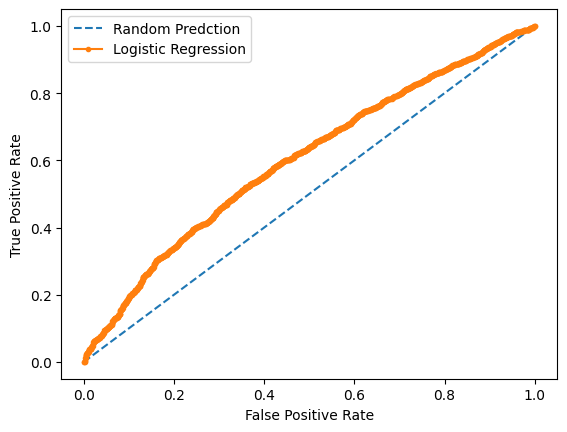

In [ ]:
lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print(ns_auc)
print(lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Recall and true negative rate are also decreasing with increase in threshold rate. However, precision and false positive rate are increasing with increasing threshold.

In [ ]:
#@title random over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

freq = y_train.value_counts()           # count frequency of different classes in loan status
freq/sum(freq)*100

freq = y_resampled.value_counts()           # count frequency of different classes in loan status
freq/sum(freq)*100                      # get percentage of above


0    50.0
1    50.0
Name: loan_status, dtype: float64

In [ ]:
lgstc_reg =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_reg.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_reg.intercept_, lgstc_reg.coef_)     # get the coefficients of each features



lgstc_resampled =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_resampled.fit(X_resampled, y_resampled)     # fit training data on logistic regression

print(lgstc_resampled.intercept_, lgstc_resampled.coef_)     # get the coefficients of each features



[-6.5652302] [[ 0.139496    0.00410667 -0.00112302  0.0112521 ]]
[-8.66405426] [[ 0.14700431  0.00335773 -0.00330849  0.01215894]]


In [ ]:
y_pred = lgstc_reg.predict(X_test)     # predict default loans based on test data set

y_pred_re = lgstc_resampled.predict(X_test)     # predict default loans based on test data set

In [ ]:
results_re = pd.DataFrame(columns=["resampled","accuracy", "recall", "tnr", "fpr", "precision", "f1_score"])  # df to store results
results_re['resampled'] = ["without","with"]

lgstc_reg.fit(X_train, y_train)                                    # fit data to model
preds = lgstc_reg.predict(X_test)
cm = confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)    # confusion matrix


print(cm)
print(' ')

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

results_re.iloc[0,1] = accuracy_score(y_test, preds)
results_re.iloc[0,2] = recall_score(y_test, preds)
results_re.iloc[0,3] = TN/(FP+TN)                                                                         # True negative rate
results_re.iloc[0,4] = FP/(FP+TN)                                                                         # False positive rate
results_re.iloc[0,5] = precision_score(y_test, preds)
results_re.iloc[0,6] = f1_score(y_test, preds)


lgstc_resampled.fit(X_resampled, y_resampled)                              # fit data to model
preds = lgstc_resampled.predict(X_test)
cm = confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)    # confusion matrix


print(cm)
print(' ')

TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

results_re.iloc[1,1] = accuracy_score(y_test, preds)
results_re.iloc[1,2] = recall_score(y_test, preds)
results_re.iloc[1,3] = TN/(FP+TN)                                                                         # True negative rate
results_re.iloc[1,4] = FP/(FP+TN)                                                                         # False positive rate
results_re.iloc[1,5] = precision_score(y_test, preds)
results_re.iloc[1,6] = f1_score(y_test, preds)
print(((TP-4*FP)/5916)*100)
print('ALL METRICS')
print( results_re.T)


[[4858    0]
 [1058    0]]
 
[[2404 2454]
 [ 357  701]]
 
16.49763353617309
ALL METRICS
                  0         1
resampled   without      with
accuracy   0.821163  0.524848
recall          1.0  0.494854
tnr             0.0  0.662571
fpr             1.0  0.337429
precision  0.821163  0.870699
f1_score   0.901801  0.631054


In [ ]:
#@title with regularization

lgstc_org =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_org.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_org.intercept_, lgstc_org.coef_)     # get the coefficients of each features

lgstc_reg_r =  LogisticRegression(penalty='l2', solver='newton-cg')     # create an instance of logistic regression

lgstc_reg_r.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_reg_r.intercept_, lgstc_reg_r.coef_)     # get the coefficients of each features


[-6.5652302] [[ 0.139496    0.00410667 -0.00112302  0.0112521 ]]
[-6.56555727] [[ 0.1390116   0.00410784 -0.00112265  0.01125283]]


In [ ]:
y_pred = lgstc_reg.predict(X_test)                           # predict default loans based on test data set

In [ ]:
THRESHOLD = [0.4, 0.5, 0.6, 0.725, 0.75, 0.775, 0.80,0.82, 0.823,0.825,0.827,0.85,0.9]
results_r = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results_r['THRESHOLD'] = THRESHOLD
profits_r= pd.DataFrame(columns=["THRESHOLD", "profit"])
profits_r['THRESHOLD'] = THRESHOLD                                                                          # threshold column

j = 0
for i in THRESHOLD:                                                                                        # iterate over each threshold


    lgstc_reg_r.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(lgstc_reg_r.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1

    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 5916 )*100                   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]

    results_r.iloc[j,1] = accuracy_score(y_test, preds)
    results_r.iloc[j,2] = recall_score(y_test, preds)
    results_r.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results_r.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results_r.iloc[j,5] = precision_score(y_test, preds)
    results_r.iloc[j,6] = f1_score(y_test, preds)

    profits_r.iloc[j,1]=TP-4*FP


    j += 1

print('ALL METRICS')
print( results_r.T)


Confusion matrix for threshold = 0.4
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.5
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.6
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.725
[[81.49087221  0.62542258]
 [17.69776876  0.18593644]]
 
Confusion matrix for threshold = 0.75
[[77.5862069   4.5300879 ]
 [16.26098715  1.62271805]]
 
Confusion matrix for threshold = 0.775
[[68.54293442 13.57336038]
 [13.42123056  4.46247465]]
 
Confusion matrix for threshold = 0.8
[[55.29073698 26.82555781]
 [ 9.73630832  8.14739689]]
 
Confusion matrix for threshold = 0.82
[[44.65855308 37.45774172]
 [ 6.96416498 10.91954023]]
 
Confusion matrix for threshold = 0.823
[[42.84989858 39.26639621]
 [ 6.50777552 11.37592968]]
 
Confusion matrix for threshold = 0.825
[[41.73427992 40.38201487]
 [ 6.25422583 11.62947938]]
 
Confusion matrix for threshold = 0.827
[[40.567951

In [ ]:
print( 'with regulariztion' )
print(results_r.T )
print(profits_r.T)

print(" ")
print( 'without regulariztion' )
print(results.T )
print(profits.T)

with regulariztion
                 0         1         2         3         4         5   \
THRESHOLD       0.4       0.5       0.6     0.725      0.75     0.775   
accuracy   0.821163  0.821163  0.821163  0.816768  0.792089  0.730054   
recall          1.0       1.0       1.0  0.992384  0.944833  0.834706   
tnr             0.0       0.0       0.0  0.010397  0.090737  0.249527   
fpr             1.0       1.0       1.0  0.989603  0.909263  0.750473   
precision  0.821163  0.821163  0.821163  0.821575  0.826729  0.836255   
f1_score   0.901801  0.901801  0.901801  0.898937  0.881844   0.83548   

                 6         7         8         9         10        11  \
THRESHOLD       0.8      0.82     0.823     0.825     0.827      0.85   
accuracy   0.634381  0.555781  0.542258  0.533638  0.524341  0.427992   
recall     0.673322  0.543845   0.52182  0.508234   0.49403  0.348909   
tnr        0.455577  0.610586  0.636106  0.650284  0.663516  0.791115   
fpr        0.544423  0.389414  

In [ ]:
#@title solver : lbfgs
lgstc_reg =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_reg.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_reg.intercept_, lgstc_reg.coef_)     # get the coefficients of each features

lgstc_reg_l =  LogisticRegression(penalty="none", solver='lbfgs')     # create an instance of logistic regression

lgstc_reg_l.fit(X_train, y_train)     # fit training data on logistic regression

print(lgstc_reg_l.intercept_, lgstc_reg_l.coef_)     # get the coefficients of each features

[-6.5652302] [[ 0.139496    0.00410667 -0.00112302  0.0112521 ]]
[-0.04740766] [[ 0.18505627  0.00412344 -0.00196703  0.00181069]]


In [ ]:
y_pred = lgstc_reg.predict(X_test)

In [ ]:
THRESHOLD = [0.4, 0.5, 0.6, 0.725, 0.75, 0.775, 0.80,0.82, 0.823,0.825,0.827,0.85,0.9]
results_l = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results_l['THRESHOLD'] = THRESHOLD
profits_l= pd.DataFrame(columns=["THRESHOLD", "profit"])
profits_l['THRESHOLD'] = THRESHOLD                                                                          # threshold column

j = 0
for i in THRESHOLD:                                                                                        # iterate over each threshold


    lgstc_reg_l.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(lgstc_reg_l.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1

    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 5916 )*100                   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]

    results_l.iloc[j,1] = accuracy_score(y_test, preds)
    results_l.iloc[j,2] = recall_score(y_test, preds)
    results_l.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results_l.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results_l.iloc[j,5] = precision_score(y_test, preds)
    results_l.iloc[j,6] = f1_score(y_test, preds)

    profits_l.iloc[j,1]=TP-4*FP


    j += 1

print('ALL METRICS')
print( results_l.T)


Confusion matrix for threshold = 0.4
[[8.20993915e+01 1.69033130e-02]
 [1.78837052e+01 0.00000000e+00]]
 
Confusion matrix for threshold = 0.5
[[8.20993915e+01 1.69033130e-02]
 [1.78837052e+01 0.00000000e+00]]
 
Confusion matrix for threshold = 0.6
[[8.20993915e+01 1.69033130e-02]
 [1.78837052e+01 0.00000000e+00]]
 
Confusion matrix for threshold = 0.725
[[8.20824882e+01 3.38066261e-02]
 [1.78837052e+01 0.00000000e+00]]
 
Confusion matrix for threshold = 0.75
[[82.03177823  0.08451657]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.775
[[80.39215686  1.72413793]
 [17.32589588  0.55780933]]
 
Confusion matrix for threshold = 0.8
[[66.8356998  15.280595  ]
 [13.37052062  4.51318458]]
 
Confusion matrix for threshold = 0.82
[[49.56051386 32.55578093]
 [ 9.24611224  8.63759297]]
 
Confusion matrix for threshold = 0.823
[[46.39959432 35.71670047]
 [ 8.38404327  9.49966193]]
 
Confusion matrix for threshold = 0.825
[[44.42190669 37.6943881 ]
 [ 7.72481406 10.15889114]]
 
Co

In [ ]:
print( 'lbfgs' )
print(results_l.T )
print(profits_l.T)

print(" ")
print( 'newton_cg' )
print(results.T )
print(profits.T)

lbfgs
                 0         1         2         3         4         5   \
THRESHOLD       0.4       0.5       0.6     0.725      0.75     0.775   
accuracy   0.820994  0.820994  0.820994  0.820825  0.820318    0.8095   
recall     0.999794  0.999794  0.999794  0.999588  0.998971  0.979004   
tnr             0.0       0.0       0.0       0.0       0.0  0.031191   
fpr             1.0       1.0       1.0       1.0       1.0  0.968809   
precision  0.821133  0.821133  0.821133  0.821102  0.821012  0.822695   
f1_score   0.901699  0.901699  0.901699  0.901597  0.901291  0.894069   

                 6         7         8         9         10        11  \
THRESHOLD       0.8      0.82     0.823     0.825     0.827      0.85   
accuracy   0.713489  0.581981  0.558993  0.545808  0.529581  0.349899   
recall     0.813915  0.603541  0.565047  0.540963  0.514203  0.240428   
tnr        0.252363  0.482987  0.531191  0.568053  0.600189  0.852552   
fpr        0.747637  0.517013  0.468809  0.4